In [28]:
# to do:
# - import dataset
# - explorer (noms des columns, taille, valeurs manquantes, valeurs uniques, type de données)
# - visualisation (histogramme, boxplot, scatterplot, heatmap, pairplot)
# - nettoyage (valeurs manquantes, valeurs aberrantes, valeurs dupliquées, valeurs incohérentes)
# - feature engineering (création de nouvelles variables, transformation de variables, sélection de variables)

In [29]:
%pip install pandas numpy matplotlib seaborn cartopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [30]:
landslides = pd.read_csv('data\Global_Landslide_Catalog_Export.csv', sep=';')
landslides.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [31]:
# exploration

# columns names
print("Columns names: \n", landslides.columns)

# size
print("\nSize: ", landslides.shape)

# data types
print("\nData types: \n", landslides.dtypes)


Columns names: 
 Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')

Size:  (11033, 31)

Data types: 
 source_name                   object
source_link                   object
event_id                      object
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_a

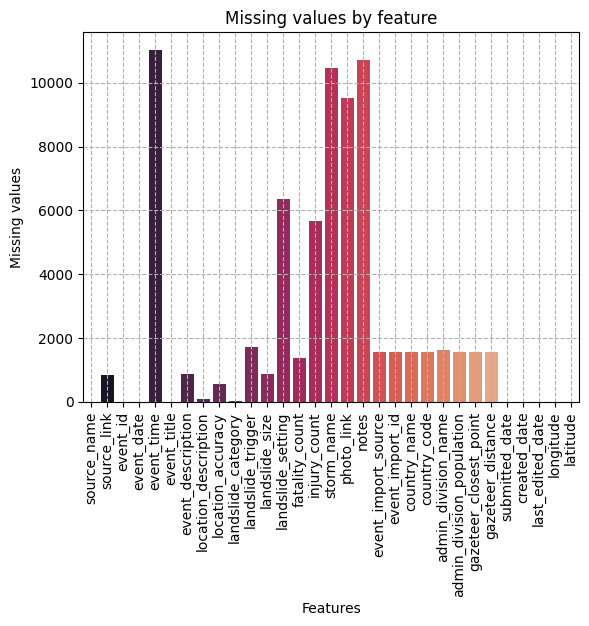

In [35]:
# missing values
missing_values = landslides.isnull().sum() + landslides.applymap(lambda x: (str)(x).strip() == 'unknown').sum() 
ax = sns.barplot(x=missing_values.index, y=missing_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.title('Missing values by feature')
#plt.tight_layout()
plt.show()

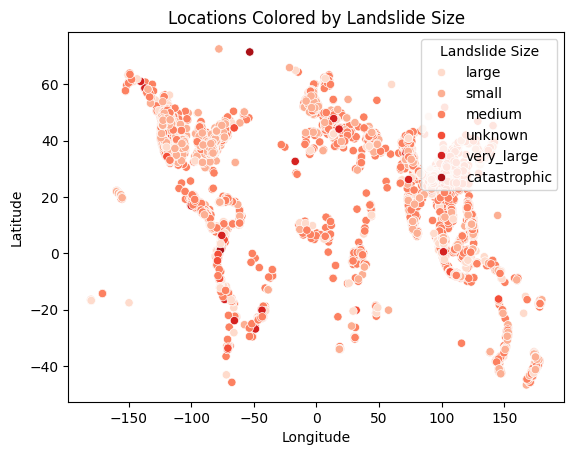

In [33]:

# plot of world map representing landslide strength

scatter = sns.scatterplot(x='longitude', y='latitude', hue='landslide_size', data=landslides, palette='Reds')


# Getting legend handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Creating the legend
plt.legend(handles, labels, title='Landslide Size', loc='upper right')
plt.title('Locations Colored by Landslide Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



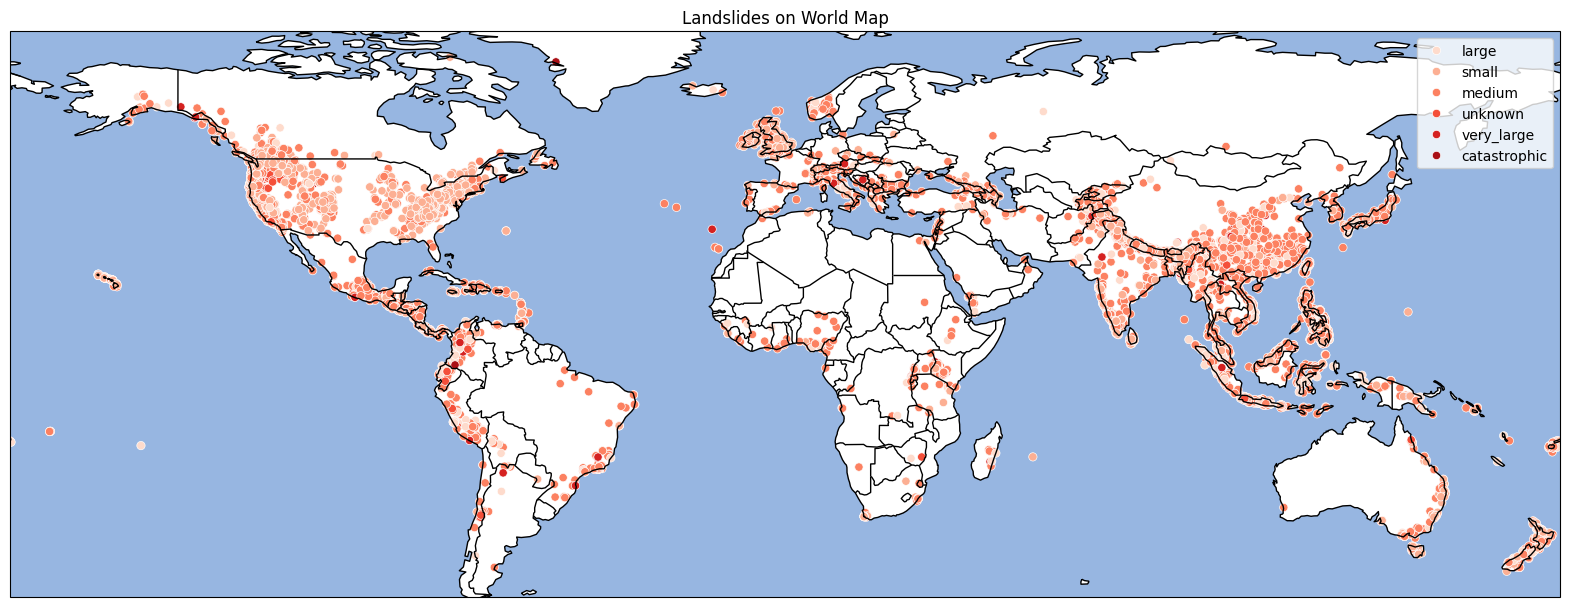

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming you have longitude, latitude columns in your 'landslides' DataFrame
# Replace 'longitude' and 'latitude' with your actual column names
longitude = landslides['longitude']
latitude = landslides['latitude']

# Create a figure and axis with Cartopy projection
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot world map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot scatter points on the map
#ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=5, color='blue', label='Landslides')
sns.scatterplot(x='longitude', y='latitude',transform=ccrs.PlateCarree(), hue='landslide_size', data=landslides, palette='Reds')

# Add legend
plt.legend()

# Show the plot
plt.title('Landslides on World Map')
plt.show()

